In [1]:
### IDEA IS TO CREATE THE MODEL, STORE THE RESULT IN A DATABASE AND SEND THE DATABASE AND NOTIFICATION THROUGH EMAIL..
# ALSO, MULTIPLE STOCK PREDICTORS WILL BE TRAINED BASED ON WHICHEVER DATA THE USER HAS ASKED 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas_datareader as pdr

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
table.head()

Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   815094         1981  
4  1467373         1989

In [3]:
list_of_stocks = input('ENTER THE STOCK TICKERS YOU WANT THE PREDICTION OF (EX: FACEBOOK: FB, GOOGLE: GOOGL, MICROSOFT: MSFT, AMAZON: AMZN) \n').split()

ENTER THE STOCK TICKERS YOU WANT THE PREDICTION OF (EX: FACEBOOK: FB, GOOGLE: GOOGL, MICROSOFT: MSFT, AMAZON: AMZN) 
FB


In [4]:
list_of_stocks

['FB']

In [5]:
import yfinance as yf 
df = pd.DataFrame()
for i in list_of_stocks:
    company_data = yf.Ticker(i)
    df[i] = company_data.history(start="2015-09-11", end="2020-09-11")['Close']

In [6]:
df

FB
Date              
2015-09-10   91.98
2015-09-11   92.05
2015-09-14   92.31
2015-09-15   92.90
2015-09-16   93.45
...            ...
2020-09-03  291.12
2020-09-04  282.73
2020-09-08  271.16
2020-09-09  273.72
2020-09-10  268.09

[1260 rows x 1 columns]

In [7]:
# NOTE SPLITS KA BHI DHYAN RAKHNA H, AISA NAA HO KI SPLITS KE VAJAH SE MODEL HAG DE
# THANKFULLY, NONE OF THE COMPANIES LISTED ABOVE HAVE HAD A STOCK SPLIT IN THE LAST FIVE YEARS 
df.isnull().sum()

FB    0
dtype: int64

In [8]:
### LSTM IS A SCALE SENSITIVE MODEL SO SCALING


from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
df2 = scaler.fit_transform(df)

df2 = pd.DataFrame(df2, columns = df.columns)

In [9]:
df2

FB
0     0.024443
1     0.024765
2     0.025962
3     0.028678
4     0.031210
...        ...
1255  0.941125
1256  0.902504
1257  0.849245
1258  0.861029
1259  0.835113

[1260 rows x 1 columns]

In [12]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size], df2[training_size: len(df2)]


print(len(train_data), len(test_data), len(train_data)+ len(test_data))

819 441 1260


In [13]:
# timesteps matlab pichla kitna features me depend kar raha h output
# 100, 120, 130, 140, 160, 170, 180... x1: 100, 120,130.. y1: 140... x2: 120, 130, 140 y2: 160...




# jo dataset liye, usko new dataset me convert karenge   
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step - 1):
        a = dataset.iloc[i:i+time_step]
        dataX.append(a)
        dataY.append(dataset.iloc[i+time_step])
    return np.array(dataX), np.array(dataY)

X_train, y_train = {}, {}
X_test, ytest = {}, {}
time_step = 100
for i in list_of_stocks:
    X_train[i], y_train[i] = create_dataset(train_data[i], time_step)
    X_test[i], ytest[i] = create_dataset(test_data[i], time_step)
X_train

{'FB': array([[0.02444301, 0.02476524, 0.02596207, ..., 0.11756583, 0.13082305,
         0.12861352],
        [0.02476524, 0.02596207, 0.02867796, ..., 0.13082305, 0.12861352,
         0.11977536],
        [0.02596207, 0.02867796, 0.03120972, ..., 0.12861352, 0.11977536,
         0.10964832],
        ...,
        [0.55537654, 0.55496225, 0.5676671 , ..., 0.23941263, 0.24829681,
         0.25050635],
        [0.55496225, 0.5676671 , 0.56476708, ..., 0.24829681, 0.25050635,
         0.23596023],
        [0.5676671 , 0.56476708, 0.55892101, ..., 0.25050635, 0.23596023,
         0.24378567]])}

In [14]:
y_train

{'FB': array([0.11977536, 0.10964832, 0.08009575, 0.06020991, 0.05924323,
        0.06596391, 0.07015283, 0.07061315, 0.06877187, 0.08529737,
        0.07733382, 0.08239735, 0.09431965, 0.0864942 , 0.09303075,
        0.09850856, 0.09781808, 0.09321488, 0.10656417, 0.10716259,
        0.1054594 , 0.09998159, 0.08773706, 0.08865771, 0.09593077,
        0.09505616, 0.10467686, 0.10688639, 0.11047689, 0.11742773,
        0.11208801, 0.11406739, 0.11590867, 0.11774995, 0.11908488,
        0.12143252, 0.12437857, 0.13565642, 0.1290278 , 0.12626588,
        0.13528816, 0.11913092, 0.11761186, 0.12447063, 0.12414841,
        0.11029276, 0.10274351, 0.1102007 , 0.10974038, 0.11125944,
        0.10573559, 0.10946419, 0.11793408, 0.1185325 , 0.12322777,
        0.10997054, 0.10785307, 0.10168477, 0.10228319, 0.13837231,
        0.14228503, 0.1468422 , 0.14159455, 0.14449457, 0.14334377,
        0.15107715, 0.14992635, 0.15572639, 0.15121525, 0.15471368,
        0.15255017, 0.14730252, 0.14122629

In [15]:


model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(50, return_sequences = True, input_shape= (100,1)))
model.add(tf.keras.layers.LSTM(50, return_sequences = True))
model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
# WOO WOO WOO
def final_pred(test_data, model):
    final_10 = test_data[-100:].copy()
     #print(final_10)
     #print(len(final_10), model.predict(final_10.reshape(1, 100, 1)))
    i= 0
    while i < 10:
        print(i)
        final_10 = np.append(final_10, model.predict(final_10.reshape(1, 100, 1)))
        final_10 = final_10[1:]
        len(final_10)
        i += 1

    return final_10[-10:]

In [17]:
train_predict, test_predict = {}, {}
final_predi = {}
for i in list_of_stocks:
    X_train[i] = X_train[i].reshape(X_train[i].shape[0], X_train[i].shape[1], 1)
    X_test[i] = X_test[i].reshape(X_test[i].shape[0], X_test[i].shape[1], 1)
    model.fit(X_train[i], y_train[i], validation_data = (X_test[i], ytest[i]), epochs= 100, batch_size= 64, verbose = 1)
    train_predict[i] = model.predict(X_train[i])
    test_predict[i] = model.predict(X_test[i])
    final_predi[i] = final_pred(X_test[i][-1], model)

Epoch 1/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0261 - val_loss: 0.0336
Epoch 2/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0023 - val_loss: 0.0129
Epoch 4/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 2s 139ms/step - loss: 9.7700e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 2s 150ms/step - loss: 9.6713e-04 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 2s 157ms/step - loss: 9.3008e-04 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 2s 155ms/step - loss: 9.5

12/12 [==============================] - 2s 164ms/step - loss: 4.4822e-04 - val_loss: 0.0051
Epoch 79/100
12/12 [==============================] - 2s 157ms/step - loss: 5.0102e-04 - val_loss: 0.0025
Epoch 80/100
12/12 [==============================] - 2s 152ms/step - loss: 4.1394e-04 - val_loss: 0.0048
Epoch 81/100
12/12 [==============================] - 2s 197ms/step - loss: 3.7225e-04 - val_loss: 0.0024
Epoch 82/100
12/12 [==============================] - 2s 174ms/step - loss: 3.9370e-04 - val_loss: 0.0021
Epoch 83/100
12/12 [==============================] - 2s 162ms/step - loss: 3.9778e-04 - val_loss: 0.0043
Epoch 84/100
12/12 [==============================] - 2s 143ms/step - loss: 3.6381e-04 - val_loss: 0.0028
Epoch 85/100
12/12 [==============================] - 2s 158ms/step - loss: 3.5873e-04 - val_loss: 0.0028
Epoch 86/100
12/12 [==============================] - 2s 163ms/step - loss: 3.3912e-04 - val_loss: 0.0042
Epoch 87/100
12/12 [==============================] - 2s 15

In [22]:
final_predi

{'FB': array([0.74845225, 0.69156075, 0.64192265, 0.60987878, 0.59589326,
        0.59639657, 0.6063208 , 0.62037814, 0.63378143, 0.64270186])}

In [23]:
train_predict

{'FB': array([[0.09046362],
        [0.10089716],
        [0.10660247],
        [0.10554237],
        [0.09844075],
        [0.08887783],
        [0.08046193],
        [0.07495076],
        [0.07234877],
        [0.07173038],
        [0.07361145],
        [0.07631845],
        [0.0792559 ],
        [0.08289119],
        [0.08596344],
        [0.08858324],
        [0.09112833],
        [0.09335353],
        [0.09464077],
        [0.09629347],
        [0.09836703],
        [0.10033794],
        [0.10140892],
        [0.10051411],
        [0.09843322],
        [0.09677396],
        [0.09589001],
        [0.0965889 ],
        [0.09860098],
        [0.10148621],
        [0.1051554 ],
        [0.10834605],
        [0.11078066],
        [0.11259829],
        [0.11405846],
        [0.1153434 ],
        [0.11667416],
        [0.1182534 ],
        [0.12103222],
        [0.12375677],
        [0.12558568],
        [0.12745674],
        [0.12765951],
        [0.12637955],
        [0.12518449],
    

In [24]:
test_predict

{'FB': array([[0.5003395 ],
        [0.49463364],
        [0.48784888],
        [0.48244634],
        [0.47977918],
        [0.47037426],
        [0.45968392],
        [0.46033943],
        [0.46830842],
        [0.4745775 ],
        [0.47363845],
        [0.4718642 ],
        [0.47105792],
        [0.46448815],
        [0.45669147],
        [0.45525125],
        [0.45460755],
        [0.45497054],
        [0.4479542 ],
        [0.421395  ],
        [0.39795908],
        [0.38573998],
        [0.38327035],
        [0.39227152],
        [0.4061059 ],
        [0.4216102 ],
        [0.428651  ],
        [0.43107155],
        [0.43510938],
        [0.44862163],
        [0.4618289 ],
        [0.46788642],
        [0.4703199 ],
        [0.47243765],
        [0.4758678 ],
        [0.4736468 ],
        [0.4676034 ],
        [0.46502128],
        [0.47099623],
        [0.4799848 ],
        [0.49040434],
        [0.5015032 ],
        [0.5081626 ],
        [0.5092594 ],
        [0.5124651 ],
    

In [25]:
print(len(train_predict['FB']))
len(pd.Series(train_predict['FB'].reshape(-1)))
pd.Series(train_predict['FB'].reshape(-1))

718


0      0.090464
1      0.100897
2      0.106602
3      0.105542
4      0.098441
         ...   
713    0.235089
714    0.241176
715    0.246988
716    0.248754
717    0.248557
Length: 718, dtype: float32

In [26]:
pred_train = pd.DataFrame()
pred_test = pd.DataFrame()
final_prediction = pd.DataFrame()
for i in list_of_stocks:
    pred_train[i] = pd.Series(train_predict[i].reshape(-1))
    len(pred_train[i])
    pred_test[i] = pd.Series(test_predict[i].reshape(-1))
    final_prediction[i] = pd.Series(final_predi[i].reshape(-1))

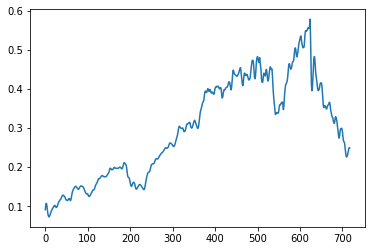

In [27]:
plt.plot(train_predict['FB'].reshape(-1))

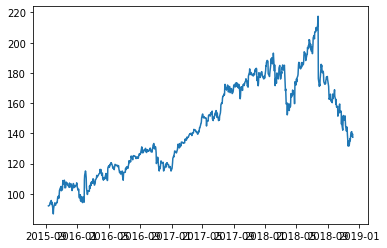

In [28]:
plt.plot(df['FB'].head(818))

In [29]:
len(test_predict['FB'])

340

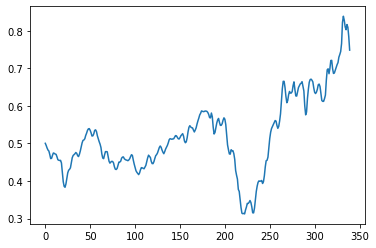

In [30]:
plt.plot(test_predict['FB'].reshape(-1))
#plt.plot(df['FB'].tail(414))

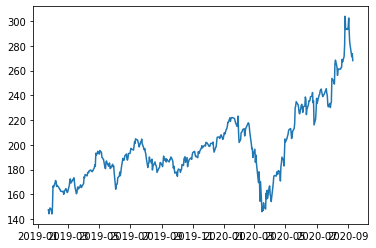

In [31]:
plt.plot(df['FB'].tail(414))

In [32]:
pred_train

FB
0    0.090464
1    0.100897
2    0.106602
3    0.105542
4    0.098441
..        ...
713  0.235089
714  0.241176
715  0.246988
716  0.248754
717  0.248557

[718 rows x 1 columns]

In [33]:
final_prediction

FB
0  0.748452
1  0.691561
2  0.641923
3  0.609879
4  0.595893
5  0.596397
6  0.606321
7  0.620378
8  0.633781
9  0.642702

In [34]:
pred_train = scaler.inverse_transform(pred_train)
pred_test = scaler.inverse_transform(pred_test)
final_prediction = scaler.inverse_transform(final_prediction)
final_prediction

array([[249.26376596],
       [236.9046563 ],
       [226.12127708],
       [219.16006583],
       [216.12185263],
       [216.23118988],
       [218.38713024],
       [221.4409464 ],
       [224.35267853],
       [226.29055299]])

In [35]:
pd.DataFrame(pred_test)

0
0    195.363754
1    194.124207
2    192.650299
3    191.476639
4    190.897232
..          ...
335  261.064606
336  264.063812
337  262.500977
338  257.056793
339  249.263748

[340 rows x 1 columns]

In [38]:
final_prediction = pd.DataFrame(final_prediction)

In [39]:
final_prediction

0
0  249.263766
1  236.904656
2  226.121277
3  219.160066
4  216.121853
5  216.231190
6  218.387130
7  221.440946
8  224.352679
9  226.290553

In [32]:
STOP

NameError: name 'STOP' is not defined

In [40]:
import sqlite3
conn = sqlite3.connect('EKDAM_NEW_DATABASE')
final_prediction.to_sql('new_table_name', conn, if_exists='replace', index=False)
pd.read_sql('select * from new_table_name', conn)

0
0  249.263766
1  236.904656
2  226.121277
3  219.160066
4  216.121853
5  216.231190
6  218.387130
7  221.440946
8  224.352679
9  226.290553

In [41]:
import smtplib

from email.mime.multipart import MIMEMultipart

from email.mime.text import MIMEText

from email.mime.base import MIMEBase

from email import encoders

fromm = "edisingh250@gmail.com"

to = "edisingh250@gmail.com"

# instance of MIMEMultipart

data = MIMEMultipart()

# storing the senders email address  

data['From'] = fromm

# storing the receivers email address 

data['To'] = to

# storing the subject 

data['Subject'] = "STOCK PRICE DATA"

# string to store the body of the mail

body = "THIS IS THE STOCK PRICE PREDICTION YOU ASKED FOR"

# attach the body with the msg instance

data.attach(MIMEText(body, 'plain'))

# open the file to be sent 

filename = "EKDAM_NEW_DATABASE.db"

attachment = open(r"C:\Users\ADITYA\hhh\EKDAM_NEW_DATABASE", "rb")

# instance of MIMEBase and named as p

p = MIMEBase('application', 'octet-stream')

# To change the payload into encoded form

p.set_payload((attachment).read())

# encode into base64

encoders.encode_base64(p)

p.add_header('Content-Disposition', "attachment; filename= %s" % filename)

# attach the instance 'p' to instance 'msg'

data.attach(p)

# creates SMTP session

s = smtplib.SMTP('smtp.gmail.com', 587)

# start TLS for security

s.starttls()

# Authentication

s.login(fromm, "Adityasingh@99")

# Converts the Multipart msg into a string

text = data.as_string()

# sending the mail

s.sendmail(fromm, to, text)

# terminating the session

s.quit()

(221, b'2.0.0 closing connection j14sm4709014pjz.21 - gsmtp')

In [1]:
### SO THIS WAS MY PROJECT, YOU LIST THE COMPANIES WHOSE NEXT 10 DAY STOCK YOU WANT TO PREDICT, AND IT WILL EMAIL YOU IT'S PREDICTIONS 